# Analyzing Youtube trending data starting from late 2020

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("US_youtube_trending_data.csv")
data

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199185,drvPVTMQ8fU,Film Theory: Mario is IMMORTAL! (Super Mario M...,2023-04-23T17:05:07Z,UC3sznuotAs2ohg_U__Jzj_Q,The Film Theorists,1,2023-04-30T00:00:00Z,Mario|mario movie|super mario bros|super mario...,2475971,109521,0,6203,https://i.ytimg.com/vi/drvPVTMQ8fU/default.jpg,False,False,*SUBSCRIBE to Film Theory!*Don't miss a Film T...
199186,0nMgqZtksyc,Aaron Rodgers Has OFFICIALLY Been Traded To Th...,2023-04-24T20:40:51Z,UCxcTeAKWJca6XyJ37_ZoKIQ,The Pat McAfee Show,17,2023-04-30T00:00:00Z,pat mcafee|podcast|sports|nfl|ncaa|football|fo...,519306,10084,0,1306,https://i.ytimg.com/vi/0nMgqZtksyc/default.jpg,False,False,This is a conversation from The Pat McAfee Sho...
199187,X0dLL4uYivE,My First Game In Japan Broke Records,2023-04-23T15:15:01Z,UCczKsS4gTjJzU5zayrNnwEA,Trevor Bauer,17,2023-04-30T00:00:00Z,[None],1100305,28114,0,1328,https://i.ytimg.com/vi/X0dLL4uYivE/default.jpg,False,False,Get BauerOutage Merch from here 👉 https://www....
199188,oWc6RY8U6KQ,MY DAUGHTER'S DREAM VACATION in Alphabetical O...,2023-04-22T14:00:09Z,UCKaCalz5N5ienIbfPzEbYuA,Jordan Matter,24,2023-04-30T00:00:00Z,jordan matter|salish matter|hudson matter|nali...,7368531,105583,0,72654,https://i.ytimg.com/vi/oWc6RY8U6KQ/default.jpg,False,False,My daughter Salish and son Hudson attempt thei...


# Can talk about how dislikes got removed and that affected the data

In [4]:
data.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

Currently the dates are of type object, which will cause issues when plotting. Let's turn them into datetimes.

In [5]:
data["publishedAt"] = pd.to_datetime(data["publishedAt"])
data["trending_date"] = pd.to_datetime(data["trending_date"])

In [6]:
print(data["publishedAt"].dtype)
print(data["trending_date"].dtype)

datetime64[ns, UTC]
datetime64[ns, UTC]


Let's try to see what the top videos look like to find out more.

In [7]:
sort = data.sort_values("view_count", ascending = False)
sort.head(50)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
152788,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-10 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,277791741,12993894,0,3534337,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152568,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-09 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,273162966,12937252,0,3516745,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152365,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-08 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,268758295,12882841,0,3504692,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
152175,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-07 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,264459017,12829059,0,3491132,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
56374,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21 03:46:13+00:00,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,10,2021-05-30 00:00:00+00:00,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021534,150989,6738537,https://i.ytimg.com/vi/WMweEpGlu_U/default.jpg,False,False,BTS (방탄소년단) 'Butter' Official MV Credits: Dire...
151968,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-06 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,260126694,12773474,0,3479717,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
151773,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-05 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,255524865,12715882,0,3466961,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
151570,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-04 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,250963177,12653408,0,3450920,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
151372,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-03 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,245994768,12577694,0,3438048,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...
151167,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,UCOmHUn--16B90oW2L6FRR3A,BLACKPINK,10,2022-09-02 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,240757307,12502699,0,3424014,https://i.ytimg.com/vi/gQlMMD8auMs/default.jpg,False,False,BLACKPINK - ‘Pink Venom’ M/VKick in the door W...


It looks like since the data collection method for this dataset just scans the videos on the trending tabe every day, videos with the same title can have multiple entries.

In [8]:
sort.head(50)["tags"]

152788    YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
152568    YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
152365    YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
152175    YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
56374                       BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄
151968    YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
151773    YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
151570    YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
151372    YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
151167    YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
150968    YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
3358                        BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄
150758    YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
150544    YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
3137                        BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄
150335    YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...
150128    YG Entertainment|YG|와이지|K-pop|

It looks like some videos have no tags! Although that's not a big deal, it's good to keep in mind when we use them.

# Data visualization
Let's make some preliminary plots of viewcounts, likes, and dislikes.

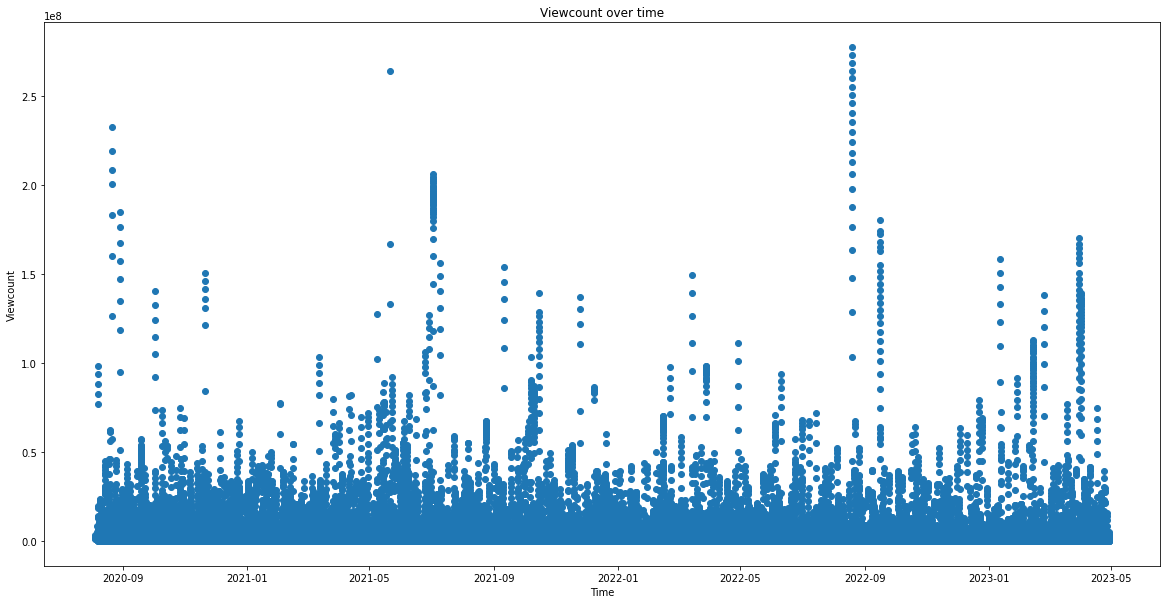

In [9]:
plt.figure(figsize=(20,10))
plot = plt.scatter(np.array(data["publishedAt"]), np.array(data["view_count"]))
plt.ylabel("Viewcount")
plt.xlabel("Time")
plt.title("Viewcount over time")
plt.show()

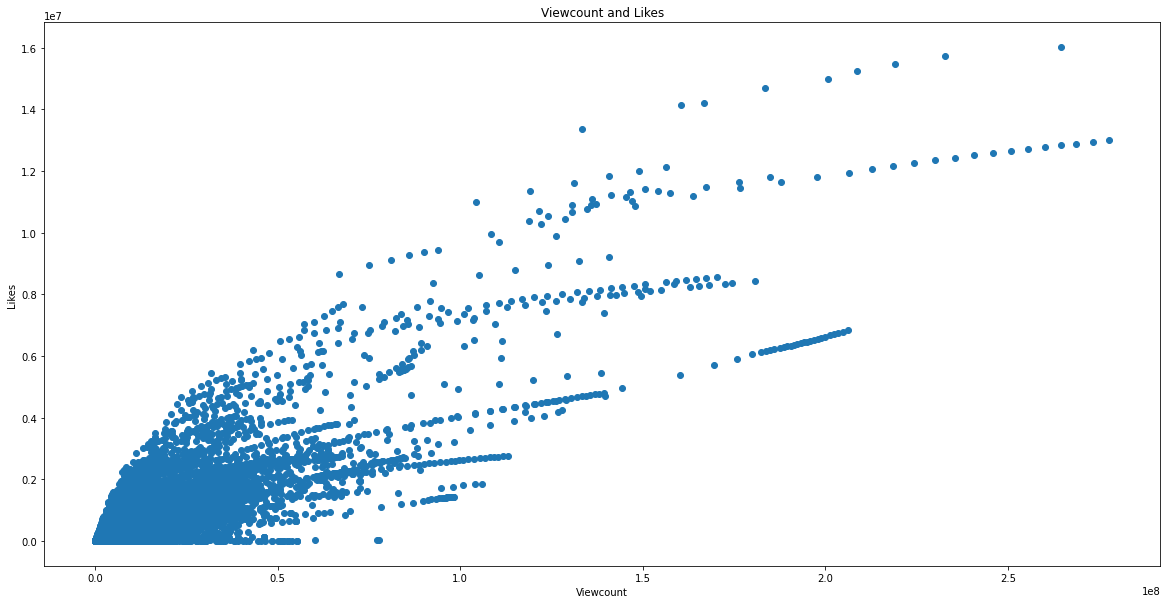

In [10]:
plt.figure(figsize=(20,10))
plot = plt.scatter(np.array(data["view_count"]), np.array(data["likes"]))
plt.xlabel("Viewcount")
plt.ylabel("Likes")
plt.title("Viewcount and Likes")
plt.show()

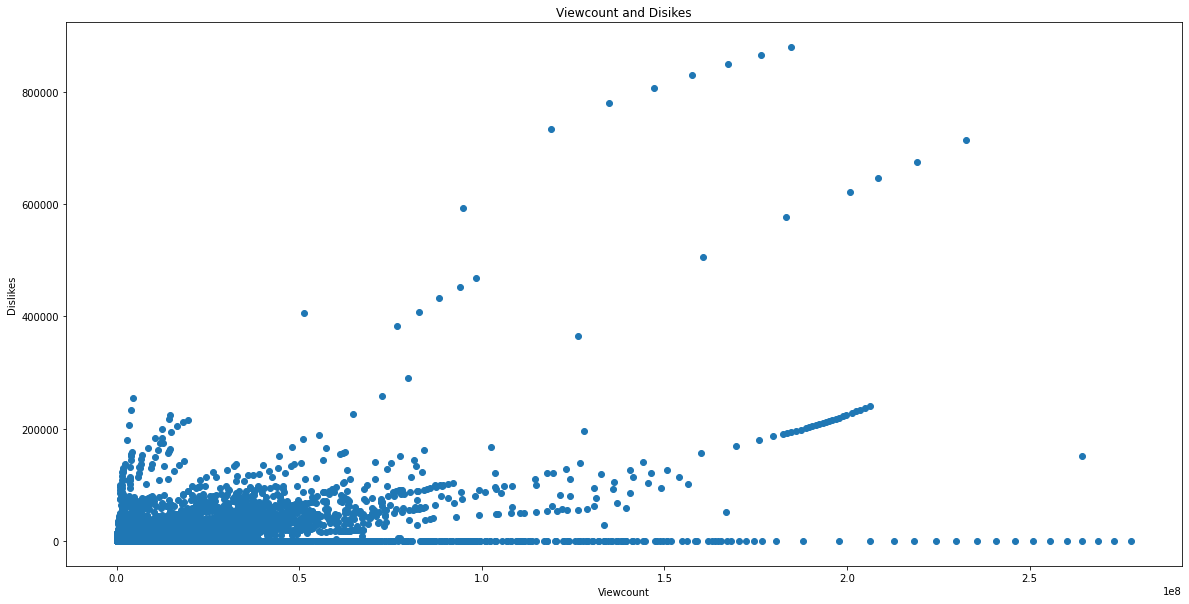

In [11]:
plt.figure(figsize=(20,10))
plot = plt.scatter(np.array(data["view_count"]), np.array(data["dislikes"]))
plt.xlabel("Viewcount")
plt.ylabel("Dislikes")
plt.title("Viewcount and Disikes")
plt.show()

Some areas seem to have an abnormally high number of data points correlated to each other in a linear relationship. Why is that? Here is my hypothesis: since all of the rows are not unique, one video can appear multiple times! Thus, the abnormal lines in the data are from one video gaining many views/likes/dislikes over a short period of time! Furthermore, a video's vies/likes/dislikes grow, but tend to taper off before the video finally stops trending, which explains the concentration of points at the tip of lines, and also why it seems like the lines are moving towards higher views/likes/dislikes.

In [25]:
grouped = data.groupby(["title"])
print(data.shape)
grouped.ngroups

(199190, 16)


37251

The dataset originally had 199,190 rows and 16 columns. With groupby, we find that there are 37,251 unique videos. 

In [33]:
# with assistance from https://stackoverflow.com/questions/53842287/select-rows-with-highest-value-from-groupby
unique=data.loc[grouped["view_count"].idxmax()]
unique

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
29372,3BgG4bUDHa4,!@#$%$#!! || Dubov vs Carlsen || Airthings Mas...,2020-12-30 17:43:29+00:00,UCL5YbN5WLFD8dLIegT5QAbA,agadmator's Chess Channel,24,2021-01-09 00:00:00+00:00,agadmator|chess|best chess channel|best youtub...,609588,25234,283,2186,https://i.ytimg.com/vi/3BgG4bUDHa4/default.jpg,False,False,Follow me on Instagram for extra content https...
64132,HFk73_EdK3o,#1 76ERS at #5 HAWKS | FULL GAME HIGHLIGHTS | ...,2021-06-17 02:45:41+00:00,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2021-06-21 00:00:00+00:00,Basketball|G League|NBA|game-0042000205,1605052,16700,677,5527,https://i.ytimg.com/vi/HFk73_EdK3o/default.jpg,False,False,#1 76ERS at #5 HAWKS | FULL GAME HIGHLIGHTS | ...
112783,pIB3neebwSk,#1 Absolute Best Remedy for Dry and Wrinkled H...,2022-02-17 11:15:05+00:00,UC3w193M5tYPJqF0Hi-7U-2g,Dr. Eric Berg DC,27,2022-02-22 00:00:00+00:00,#1 Absolute Best Remedy for Dry and Wrinkled H...,1318126,45372,0,2872,https://i.ytimg.com/vi/pIB3neebwSk/default.jpg,False,False,Lotion may actually make your hands drier. Giv...
23569,QY7ArP0ebaM,#1 Alabama Crimson Tide vs. LSU Tigers: Extend...,2020-12-06 05:05:49+00:00,UCja8sZ2T4ylIqjggA1Zuukg,CBS Sports HQ,17,2020-12-10 00:00:00+00:00,Alabama Crimson Tide|LSU Tigers|Alabama Crimso...,335967,1644,102,493,https://i.ytimg.com/vi/QY7ArP0ebaM/default.jpg,False,False,No. 1 Alabama leads LSU 52-17 after three quar...
87371,AtW81jzLx2o,#1 Alabama Vs Texas A&M Extended Highlights | ...,2021-10-10 04:42:02+00:00,UCja8sZ2T4ylIqjggA1Zuukg,CBS Sports HQ,17,2021-10-16 00:00:00+00:00,college football|Alabama|roll tide|Texas a&m|A...,635561,5203,206,1228,https://i.ytimg.com/vi/AtW81jzLx2o/default.jpg,False,False,Extended highlights from Texas A&M upset over ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134781,7UfiCa244XE,🥪 👜 Ma’amalade sandwich Your Majesty?,2022-06-06 12:32:01+00:00,UCTkC3Jt91QkqNAE4FGWkEIQ,The Royal Family,22,2022-06-12 00:00:00+00:00,[None],3695044,106396,0,0,https://i.ytimg.com/vi/7UfiCa244XE/default.jpg,True,False,The Queen and Paddington Bear get the Platinum...
63555,BNqg-1GBpLw,🥭Fresh Farm Fruit Eating | Tiktok China | Oddl...,2021-06-03 13:39:19+00:00,UCyEHvAVMP9yY0Gp0ndLnwEQ,Fruit Satisfying,22,2021-06-17 00:00:00+00:00,Tik Tok China|farm fresh ninja fruit|Fresh fru...,55054684,661233,47998,2087,https://i.ytimg.com/vi/BNqg-1GBpLw/default.jpg,False,False,Fresh Farm Fruit Eating on Orange Garden | Odd...
121377,VWo7X6RijrM,🥳How To UNLOCK THE FREE EXCLUSIVE *EASY* in Pe...,2022-04-01 17:18:08+00:00,UC5_pDWCrgnvP4YpWsWFPv7g,Sonsss,20,2022-04-06 00:00:00+00:00,sonsss|new|roblox|sonsss pet sim x|pet simulat...,875677,15328,0,2970,https://i.ytimg.com/vi/VWo7X6RijrM/default.jpg,False,False,🥳How To UNLOCK THE FREE EXCLUSIVE *EASY* in Pe...
117943,ClSgM70C6r0,🦌 WOODLAND EGG UPDATE! 🌲 8 NEW PETS! 😲 Adopt M...,2022-03-16 18:00:12+00:00,UCVdPM7Dgxm3cHXM2ro__bUg,PlayAdoptMe,20,2022-03-20 00:00:00+00:00,adoptme|playadoptme|playadoptmeroblox|adoptmer...,383351,23615,0,3298,https://i.ytimg.com/vi/ClSgM70C6r0/default.jpg,False,False,🥚 Woodland Egg Update! 🥚🦌 8 new woodsy creatur...


This is after taking the row with the highest views for each unique video. Let's plot these with the same graphs.

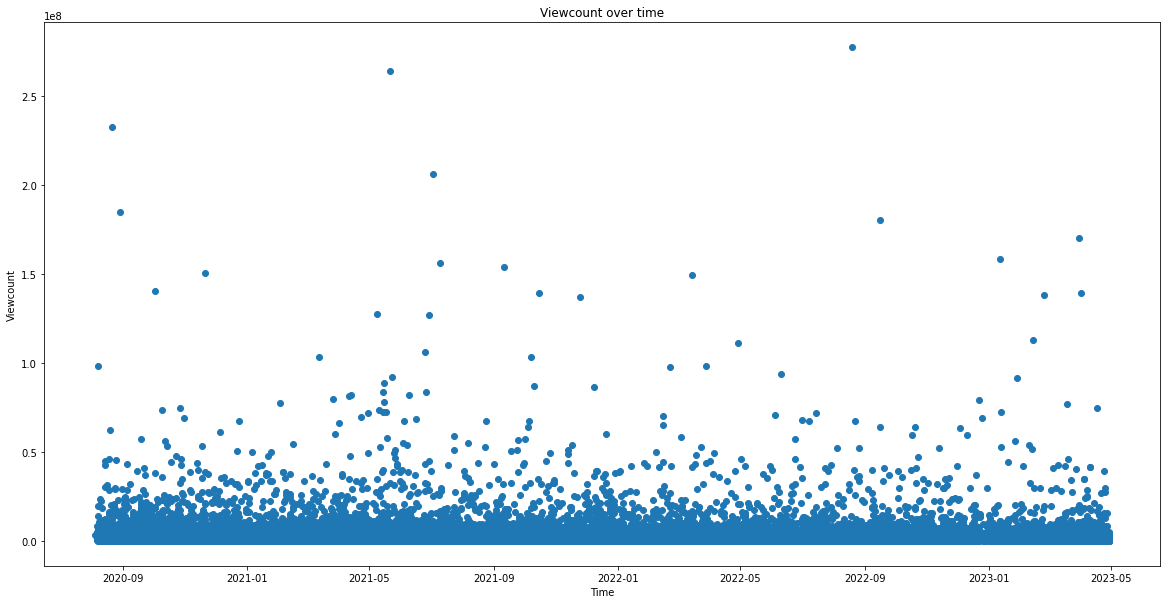

In [34]:
plt.figure(figsize=(20,10))
plot = plt.scatter(np.array(unique["publishedAt"]), np.array(unique["view_count"]))
plt.ylabel("Viewcount")
plt.xlabel("Time")
plt.title("Viewcount over time")
plt.show()

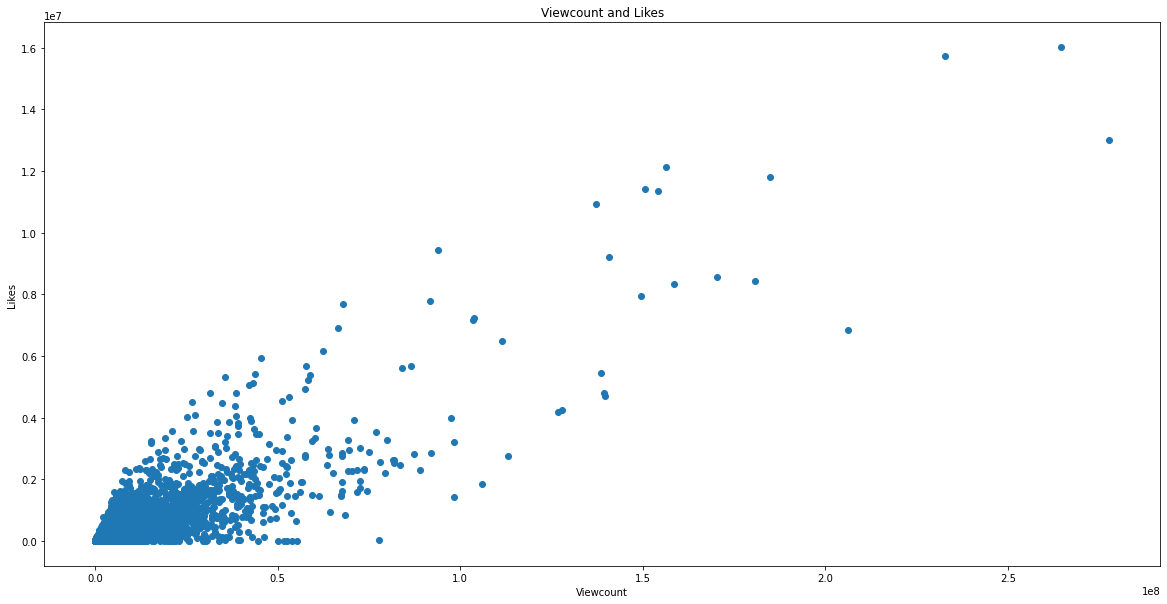

In [35]:
plt.figure(figsize=(20,10))
plot = plt.scatter(np.array(unique["view_count"]), np.array(unique["likes"]))
plt.xlabel("Viewcount")
plt.ylabel("Likes")
plt.title("Viewcount and Likes")
plt.show()

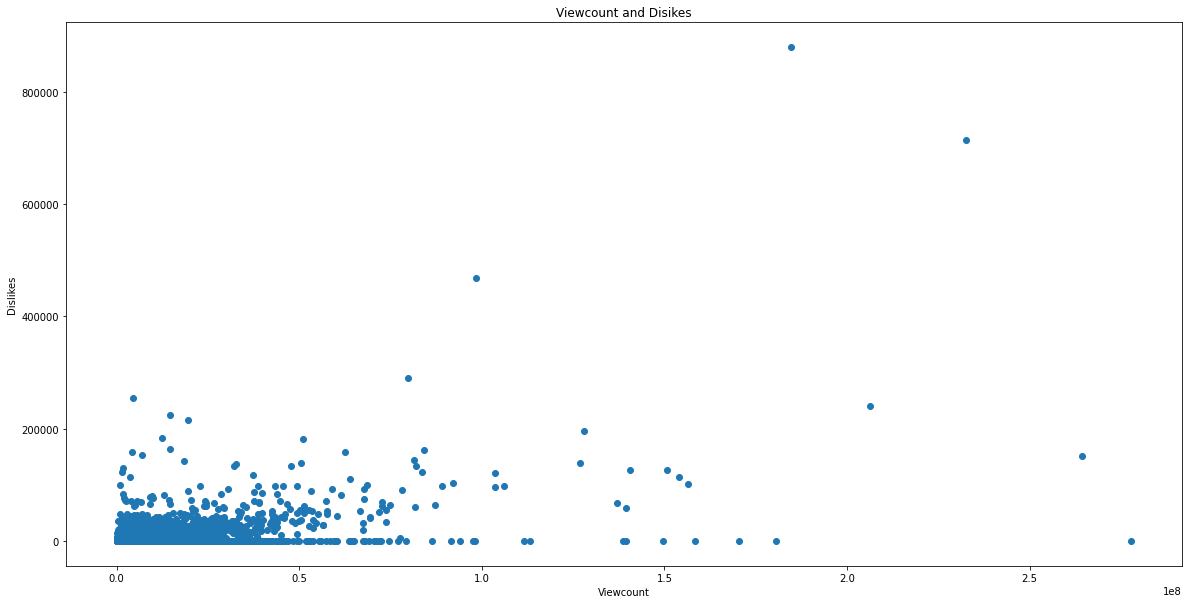

In [36]:
plt.figure(figsize=(20,10))
plot = plt.scatter(np.array(unique["view_count"]), np.array(unique["dislikes"]))
plt.xlabel("Viewcount")
plt.ylabel("Dislikes")
plt.title("Viewcount and Disikes")
plt.show()

As you can see, there are no more lines! This supports our earlier hypothesis.